A and B are towns 20km and 30km from a straight stretch of river 100km long.  Water is pumped from a point P on the river by pipelines to both towns.  Where should P be located to minimize the total length of pipe AP + PB?

In [1]:
from math import sqrt

In [2]:
R = 100
A = 20
B = 30

In [3]:
def f(x):
    return sqrt(A**2 + x**2) + sqrt(B**2 + (R-x)**2)

In [13]:
# https://en.wikipedia.org/wiki/Golden-section_search
gr = (sqrt(5) + 1) / 2

def gss(f, a, b, c, tau = 1e-6):
    '''
    Python recursive version of Golden Section Search algorithm.

    This code appears to be broken - see the talk page.

    tau is the tolerance for the minimal value of function f
    b is any number between the interval a and c
    '''
    if b < c:
        x = b + (2 - gr) * (c - b)
    else:
        x = b - (2 - gr) * (b - a)
    if abs(c - a) < tau * (abs(b) + abs(x)): 
        return (c + a) / 2
    if f(x) < f(b):
        return gss(f, b, x, c, tau) if b < c else gss(f, a, x, b, tau)
    else:
        return gss(f, a, b, x, tau) if b < c else gss(f, x, b, c, tau)

In [5]:
gss(f, 0, R/2, R)

40.0146627487199

In [6]:
import matplotlib.pyplot as plt

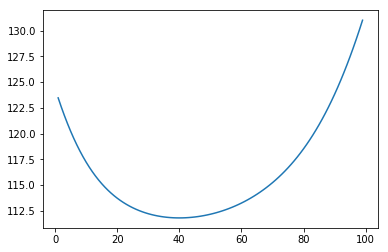

In [7]:
x = list(range(1,100))
plt.plot(x, [f(c) for c in x])
plt.show()

In [8]:
import sympy
from sympy import init_printing, simplify, factor, expand, cse, srepr, cancel
from sympy.abc import a,b,p,r
from sympy.physics.vector import vlatex
init_printing(latex_printer=vlatex, latex_mode='equation')

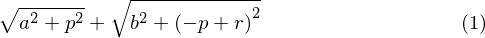

In [9]:
total_pipe = sympy.sqrt(a**2 + p**2) + sympy.sqrt(b**2 + (r-p)**2)
total_pipe

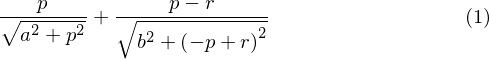

In [10]:
total_pipe_diff = sympy.diff(total_pipe, p)
total_pipe_diff

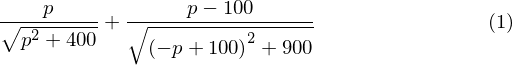

In [11]:
total_pipe_diff = total_pipe_diff.subs([(a, A),(b, B),(r, R)])
total_pipe_diff

In [12]:
total_pipe_diff_solve = sympy.solve(total_pipe_diff, p)
total_pipe_diff_solve